In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

MessageError: ignored

In [ ]:
# !git clone https://github.com/mkthoma/unet_and_vae.git

Cloning into 'unet_and_vae'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 45 (delta 23), reused 34 (delta 15), pack-reused 0
Receiving objects: 100% (45/45), 13.40 KiB | 13.40 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [ ]:
import numpy as np # for using np arrays
from unet_and_vae.UNET.dataset import *
from unet_and_vae.UNET.model import *
from unet_and_vae.UNET.utils import *
from unet_and_vae.UNET.train import *

(400, 600, 3)
(400, 600)


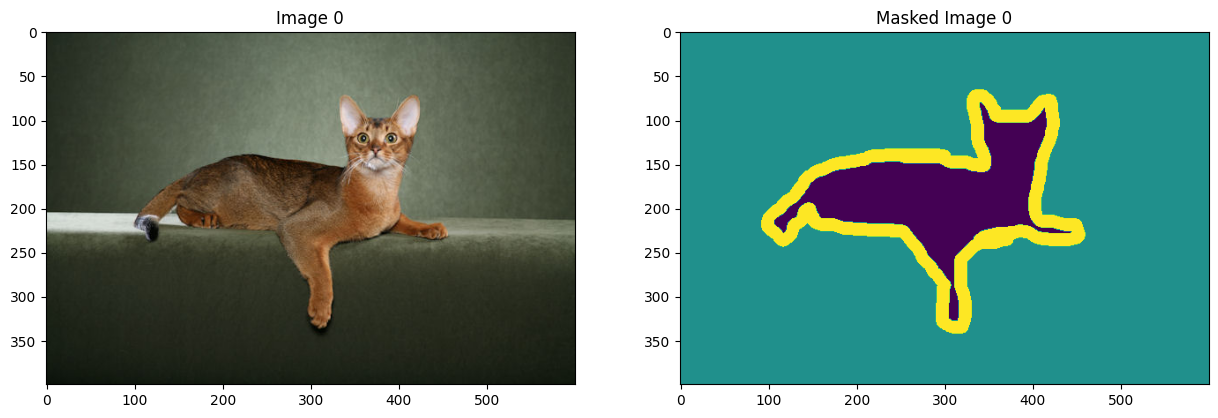

In [ ]:
# Load and View Data
""" Load Train Set and view some examples """
# Call the apt function
path1 = '/content/gdrive/MyDrive/ERA_V1/S18/images/images/'
path2 = '/content/gdrive/MyDrive/ERA_V1/S18/annotations/annotations/trimaps/'
img, mask = LoadData(path1, path2)

show_sample_images(path1, path2, img, mask, show_images = 1)

Processing image 7390 out of 7390 images
X Shape: (7390, 128, 128, 3)
Y shape: (7390, 128, 128, 1)


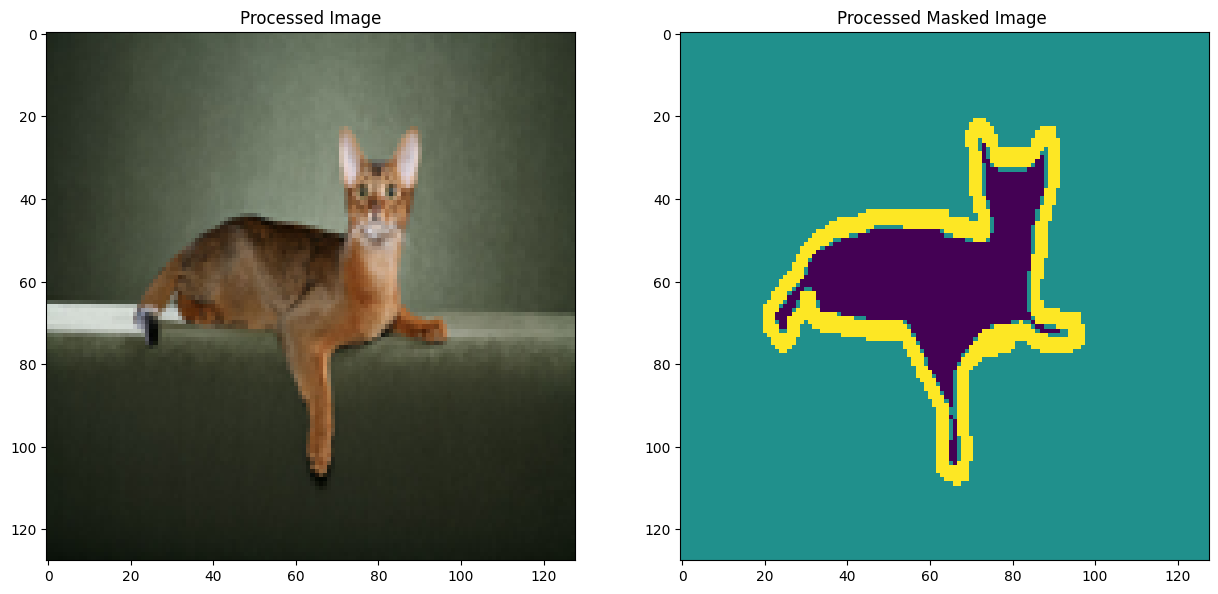

In [ ]:
# Process Data
# Define the desired shape
target_shape_img = [128, 128, 3]
target_shape_mask = [128, 128, 1]

# Process data using apt helper function
X, y = PreprocessData(img, mask, target_shape_img, target_shape_mask, path1, path2)

# QC the shape of output and classes in output dataset
print("X Shape:", X.shape)
print("Y shape:", y.shape)
# There are 3 classes : background, pet, outline

show_processed_image(X, y, image_index = 0)

In [ ]:
# Model Initialization
# # MP+Tr+BCE
unet = UNetCompiled(use_max_pooling=True, use_transpose_conv=True, use_strided_conv=False,use_upsampling=False, use_dice_loss=False, use_bce=True)

# # MP+Tr+Dice Loss
# unet = UNetCompiled(use_max_pooling=True, use_transpose_conv=True, use_strided_conv=False,
#                     use_upsampling=False, use_dice_loss=True, use_bce=False)

# # StrConv+Tr+BCE
# unet = UNetCompiled(use_max_pooling=False, use_transpose_conv=True, use_strided_conv=True,
#                     use_upsampling=False, use_dice_loss=False, use_bce=True)

# # StrConv+Ups+Dice Loss
# unet = UNetCompiled(use_max_pooling=False, use_transpose_conv=False, use_strided_conv=True,
#                     use_upsampling=True, use_dice_loss=True, use_bce=False)

Model Summary:
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 32)         9248      ['conv2d[0][0]']              
                                                                                                  
 batch_normalization (Batch  (None, 128, 128, 32)         128       ['conv2d_1[0][0]']            
 Normalization)                                                                

Epoch 1/20
185/185 [==============================] - 69s 249ms/step - loss: 1.1935 - accuracy: 0.6073 - val_loss: 0.1996 - val_accuracy: 0.7085
Epoch 2/20
185/185 [==============================] - 41s 220ms/step - loss: 0.1599 - accuracy: 0.7050 - val_loss: 0.2250 - val_accuracy: 0.7085
Epoch 3/20
185/185 [==============================] - 42s 225ms/step - loss: 0.1341 - accuracy: 0.7050 - val_loss: 0.1099 - val_accuracy: 0.7085
Epoch 4/20
185/185 [==============================] - 41s 222ms/step - loss: 0.1067 - accuracy: 0.7050 - val_loss: 0.0914 - val_accuracy: 0.7085
Epoch 5/20
185/185 [==============================] - 41s 223ms/step - loss: 0.0848 - accuracy: 0.7050 - val_loss: 0.0989 - val_accuracy: 0.7085
Epoch 6/20
185/185 [==============================] - 41s 222ms/step - loss: 0.1100 - accuracy: 0.7050 - val_loss: 0.0965 - val_accuracy: 0.7085
Epoch 7/20
185/185 [==============================] - 41s 222ms/step - loss: 0.1200 - accuracy: 0.7050 - val_loss: 0.2641 - val_ac

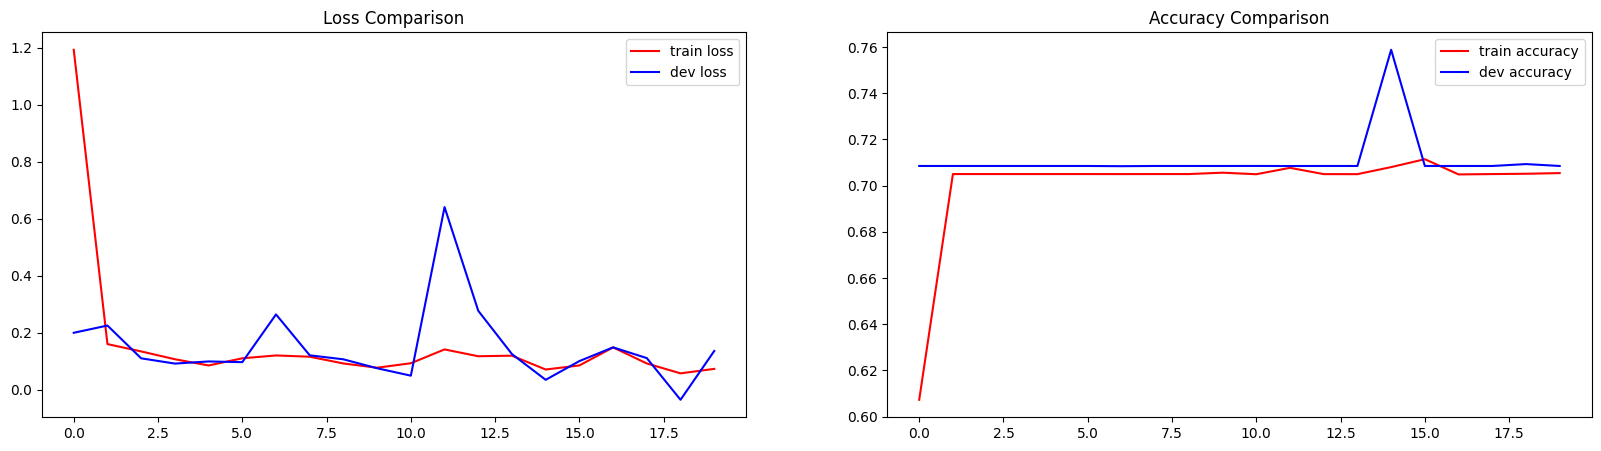

In [ ]:
# Train the model
results, unet, X_train, X_valid, y_train, y_valid = unet_train(unet, X, y)

# Evaluate Model Results
model_metrics(results)

In [ ]:
# RESULTS
# The train loss is consistently decreasing showing that Adam is able to optimize the model and find the minima
# The accuracy of train and validation is ~90% which is high enough, so low bias
# and the %s aren't that far apart, hence low variance

# View Predicted Segmentations
unet.evaluate(X_valid, y_valid)

47/47 [==============================] - 3s 54ms/step - loss: 0.1357 - accuracy: 0.7085


[0.13568009436130524, 0.7085311412811279]

In [ ]:
# # Add any index to contrast the predicted mask with actual mask
# index = 700
# VisualizeResults(X_valid, unet, y_valid, index)

Model Summary:
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_20 (Conv2D)          (None, 128, 128, 32)         896       ['input_2[0][0]']             
                                                                                                  
 conv2d_21 (Conv2D)          (None, 128, 128, 32)         9248      ['conv2d_20[0][0]']           
                                                                                                  
 batch_normalization_5 (Bat  (None, 128, 128, 32)         128       ['conv2d_21[0][0]']           
 chNormalization)                                                            

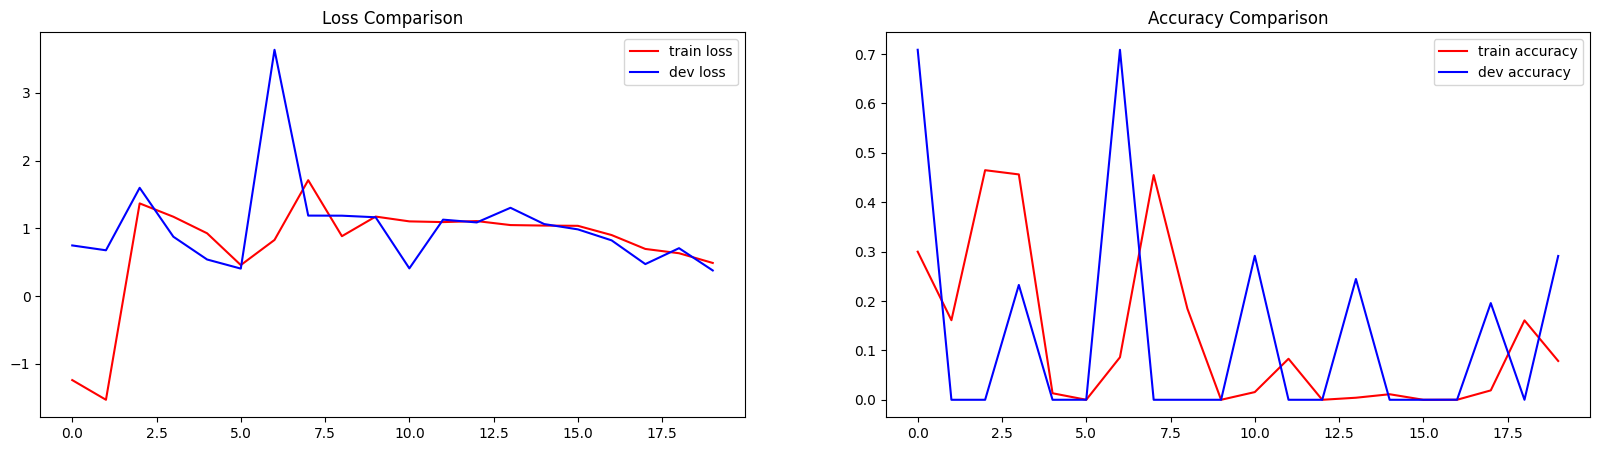

In [ ]:
# Model Initialization
# # MP+Tr+Dice Loss
unet = UNetCompiled(use_max_pooling=True, use_transpose_conv=True, use_strided_conv=False,
                    use_upsampling=False, use_dice_loss=True, use_bce=False)

# # StrConv+Tr+BCE
# unet = UNetCompiled(use_max_pooling=False, use_transpose_conv=True, use_strided_conv=True,
#                     use_upsampling=False, use_dice_loss=False, use_bce=True)

# # StrConv+Ups+Dice Loss
# unet = UNetCompiled(use_max_pooling=False, use_transpose_conv=False, use_strided_conv=True,
#                     use_upsampling=True, use_dice_loss=True, use_bce=False)

# Train the model
results, unet, X_train, X_valid, y_train, y_valid = unet_train(unet, X, y)

# Evaluate Model Results
model_metrics(results)

# RESULTS
# The train loss is consistently decreasing showing that Adam is able to optimize the model and find the minima
# The accuracy of train and validation is ~90% which is high enough, so low bias
# and the %s aren't that far apart, hence low variance

# View Predicted Segmentations
unet.evaluate(X_valid, y_valid)

# Add any index to contrast the predicted mask with actual mask
index = 700
# VisualizeResults(X_valid, unet, y_valid, index)

Model Summary:
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_40 (Conv2D)          (None, 128, 128, 32)         896       ['input_3[0][0]']             
                                                                                                  
 conv2d_41 (Conv2D)          (None, 128, 128, 32)         9248      ['conv2d_40[0][0]']           
                                                                                                  
 batch_normalization_10 (Ba  (None, 128, 128, 32)         128       ['conv2d_41[0][0]']           
 tchNormalization)                                                           

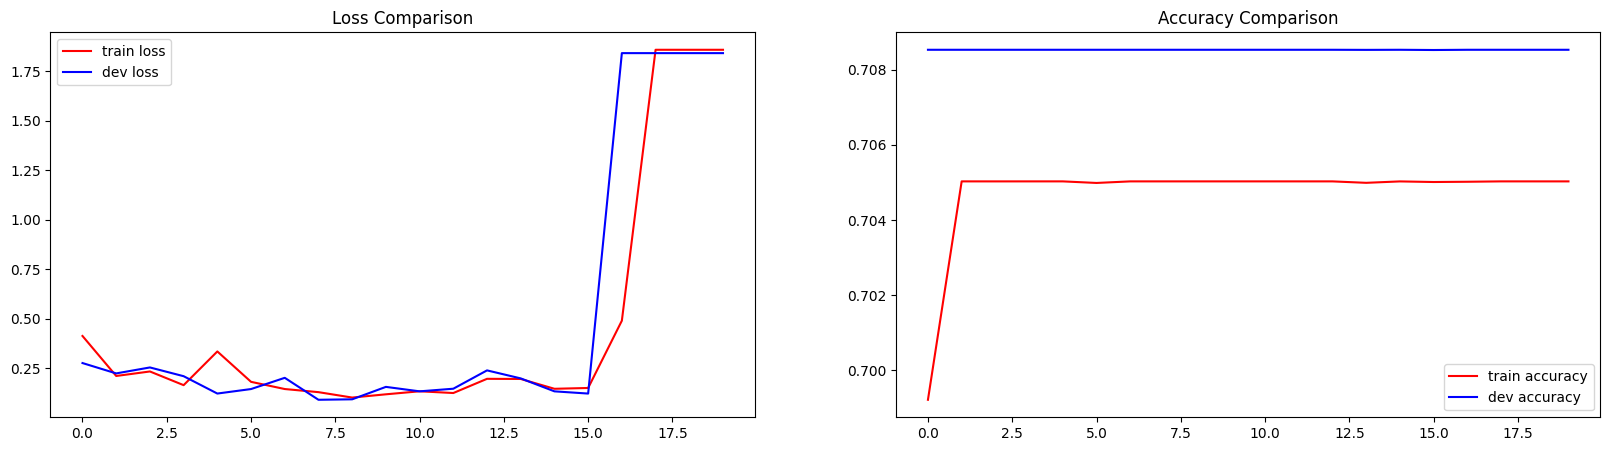

In [ ]:
# Model Initialization
# # StrConv+Tr+BCE
unet = UNetCompiled(use_max_pooling=False, use_transpose_conv=True, use_strided_conv=True,
                    use_upsampling=False, use_dice_loss=False, use_bce=True)

# Train the model
results, unet, X_train, X_valid, y_train, y_valid = unet_train(unet, X, y)

# Evaluate Model Results
model_metrics(results)

# RESULTS
# The train loss is consistently decreasing showing that Adam is able to optimize the model and find the minima
# The accuracy of train and validation is ~90% which is high enough, so low bias
# and the %s aren't that far apart, hence low variance

# View Predicted Segmentations
unet.evaluate(X_valid, y_valid)

# Add any index to contrast the predicted mask with actual mask
index = 700
# VisualizeResults(X_valid, unet, y_valid, index)

Model Summary:
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_64 (Conv2D)          (None, 128, 128, 32)         896       ['input_4[0][0]']             
                                                                                                  
 conv2d_65 (Conv2D)          (None, 128, 128, 32)         9248      ['conv2d_64[0][0]']           
                                                                                                  
 batch_normalization_15 (Ba  (None, 128, 128, 32)         128       ['conv2d_65[0][0]']           
 tchNormalization)                                                           

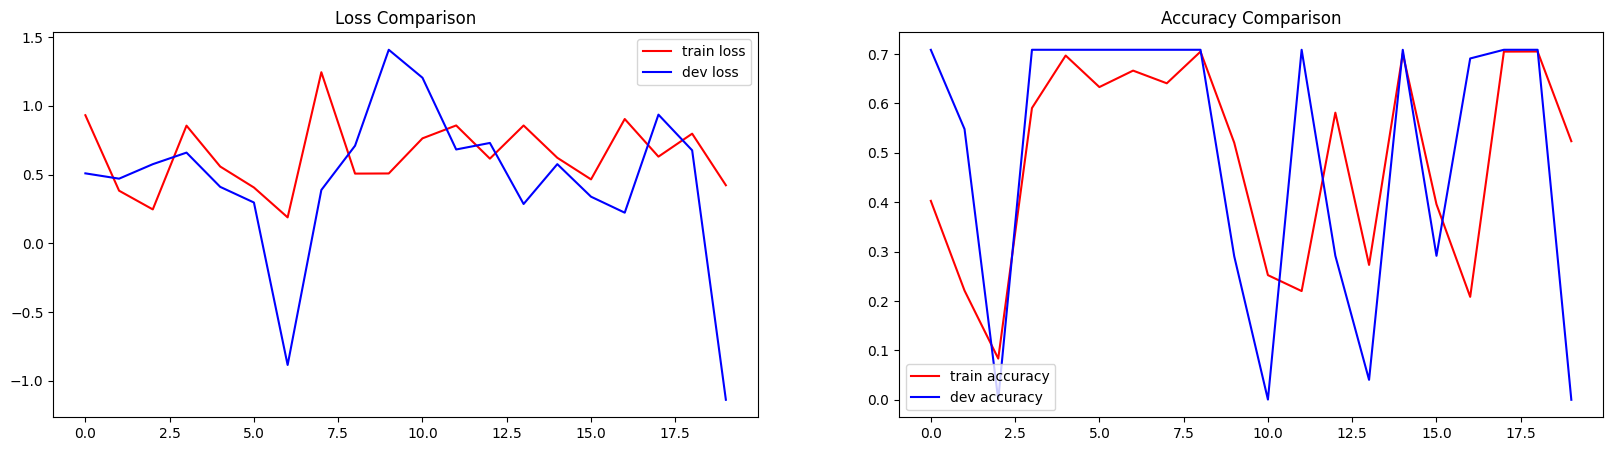

In [ ]:
# Model Initialization
# # StrConv+Ups+Dice Loss
unet = UNetCompiled(use_max_pooling=False, use_transpose_conv=False, use_strided_conv=True,
                    use_upsampling=True, use_dice_loss=True, use_bce=False)

# Train the model
results, unet, X_train, X_valid, y_train, y_valid = unet_train(unet, X, y)

# Evaluate Model Results
model_metrics(results)

# RESULTS
# The train loss is consistently decreasing showing that Adam is able to optimize the model and find the minima
# The accuracy of train and validation is ~90% which is high enough, so low bias
# and the %s aren't that far apart, hence low variance

# View Predicted Segmentations
unet.evaluate(X_valid, y_valid)

# Add any index to contrast the predicted mask with actual mask
index = 700
# VisualizeResults(X_valid, unet, y_valid, index)